Preprossin Data

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,confusion_matrix, ConfusionMatrixDisplay,classification_report, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score,train_test_split, learning_curve, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('data/raw_data/healthcare_prediction_dataset.csv')

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df.columns = [
    'Name', 'Age', 'Gender', 'Blood_type', 'Medical_condition', 'Admission_date', 'Doctor', 'Hospital', 'Insurance_provider', 'Billing_amount', 'Room_number', 'Admission_type', 'Discharge_date', 'Medication', 'Test_results'
]

df.head()

,Name,Age,Gender,Blood_type,Medical_condition,Admission_date,Doctor,Hospital,Insurance_provider,Billing_amount,Room_number,Admission_type,Discharge_date,Medication,Test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [57]:
df['Admission_type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood_type          55500 non-null  object 
 4   Medical_condition   55500 non-null  object 
 5   Admission_date      55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance_provider  55500 non-null  object 
 9   Billing_amount      55500 non-null  float64
 10  Room_number         55500 non-null  int64  
 11  Admission_type      55500 non-null  object 
 12  Discharge_date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test_results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
df.describe()  # Descriptive statistics for numerical features

,Age,Billing_amount,Room_number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [6]:
df.duplicated().sum()

534

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sort_values(ascending=False)

Name                  0
Age                   0
Gender                0
Blood_type            0
Medical_condition     0
Admission_date        0
Doctor                0
Hospital              0
Insurance_provider    0
Billing_amount        0
Room_number           0
Admission_type        0
Discharge_date        0
Medication            0
Test_results          0
dtype: int64

In [9]:
df = df[df['Billing_amount'] > 0]

In [10]:
df.shape

(54860, 15)

# Feature Engineering

In [11]:
df['Admission_date'] = pd.to_datetime(df['Admission_date'])
df['Discharge_date'] = pd.to_datetime(df['Discharge_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54860 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54860 non-null  object        
 1   Age                 54860 non-null  int64         
 2   Gender              54860 non-null  object        
 3   Blood_type          54860 non-null  object        
 4   Medical_condition   54860 non-null  object        
 5   Admission_date      54860 non-null  datetime64[ns]
 6   Doctor              54860 non-null  object        
 7   Hospital            54860 non-null  object        
 8   Insurance_provider  54860 non-null  object        
 9   Billing_amount      54860 non-null  float64       
 10  Room_number         54860 non-null  int64         
 11  Admission_type      54860 non-null  object        
 12  Discharge_date      54860 non-null  datetime64[ns]
 13  Medication          54860 non-null  object    

In [12]:
df['Admission_month'] = df['Admission_date'].dt.month
df['StayDuration'] = ((df['Discharge_date'] - df['Admission_date'])).dt.days
df.drop(columns=[
    'Admission_date',
    'Discharge_date',
    'Name',
    'Doctor',
    'Hospital',
    'Room_number'], inplace=True)
df.head()

,Age,Gender,Blood_type,Medical_condition,Insurance_provider,Billing_amount,Admission_type,Medication,Test_results,Admission_month,StayDuration
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,1,2
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,8,6
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,9,15
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,11,30
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,9,20


In [13]:
# calculate the sin and cos
months_in_a_year = 12

df['sin_Admission'] = np.sin(2 * np.pi * (df['Admission_month'] - 1) / months_in_a_year)
df['cos_Admission'] = np.cos(2 * np.pi * (df['Admission_month'] - 1) / months_in_a_year)

df.drop(columns='Admission_month', inplace=True)

df.head()

,Age,Gender,Blood_type,Medical_condition,Insurance_provider,Billing_amount,Admission_type,Medication,Test_results,StayDuration,sin_Admission,cos_Admission
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,2,0.000000,1.000000
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,6,-0.500000,-0.866025
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,15,-0.866025,-0.500000
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,30,-0.866025,0.500000
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,20,-0.866025,-0.500000


# Non numerical features

In [14]:
df_non_numerical = df.select_dtypes(exclude=['number'])

df_non_numerical

,Gender,Blood_type,Medical_condition,Insurance_provider,Admission_type,Medication,Test_results
0,Male,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal
1,Male,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive
2,Female,A-,Obesity,Aetna,Emergency,Aspirin,Normal
3,Female,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal
4,Female,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...
55495,Female,O+,Asthma,Blue Cross,Elective,Penicillin,Abnormal
55496,Female,AB-,Obesity,Cigna,Elective,Aspirin,Normal
55497,Female,B+,Hypertension,UnitedHealthcare,Urgent,Ibuprofen,Abnormal
55498,Male,O-,Arthritis,Medicare,Elective,Ibuprofen,Abnormal


## One hot encoder

In [16]:
# ohe for gender
ohe_gender = OneHotEncoder(sparse_output=False, drop="if_binary")
ohe_gender.fit(df_non_numerical[['Gender']])

df_non_numerical[ohe_gender.get_feature_names_out()] = ohe_gender.transform(df_non_numerical[['Gender']])
df_non_numerical.drop(columns='Gender', inplace=True)
df_non_numerical.rename(columns={'Gender_Male':'Gender'}, inplace=True)
df_non_numerical.head()

,Blood_type,Medical_condition,Insurance_provider,Admission_type,Medication,Test_results,Gender
0,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal,1.0
1,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive,1.0
2,A-,Obesity,Aetna,Emergency,Aspirin,Normal,0.0
3,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal,0.0
4,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal,0.0


In [17]:
# ohe for the rest
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(df_non_numerical.drop(columns='Gender'))

df_non_numerical[ohe.get_feature_names_out()] = ohe.transform(df_non_numerical.drop(columns='Gender'))
df_non_numerical = df_non_numerical.iloc[:, 6:]

df_non_numerical.head()

,Gender,Blood_type_A+,Blood_type_A-,Blood_type_AB+,Blood_type_AB-,Blood_type_B+,Blood_type_B-,Blood_type_O+,Blood_type_O-,Medical_condition_Arthritis,...,Admission_type_Emergency,Admission_type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test_results_Abnormal,Test_results_Inconclusive,Test_results_Normal
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [18]:
df_non_numerical.shape

(54860, 31)

# MinMax Scaler

In [20]:
df_numerical = df[['Age', 'StayDuration', 'Billing_amount']]

minmax_scaler = MinMaxScaler()

df_numerical = minmax_scaler.fit_transform(df_numerical)
df_numerical = pd.DataFrame(data=df_numerical, columns=['Age', 'StayDuration', 'Billing_amount'])

df_numerical.head()

,Age,StayDuration,Billing_amount
0,0.223684,0.034483,0.357256
1,0.644737,0.172414,0.637552
2,0.828947,0.482759,0.529729
3,0.197368,1.000000,0.718425
4,0.394737,0.655172,0.269720


In [21]:
df_numerical.shape

(54860, 3)

# Final Dataframe

In [22]:
df_numerical_reset = df_numerical.reset_index(drop=True)
df_non_numerical_reset = df_non_numerical.reset_index(drop=True)
df_sin_cos = df[['sin_Admission', 'cos_Admission']].reset_index(drop=True)

df_processed = pd.concat([df_numerical_reset, df_non_numerical_reset, df_sin_cos], axis=1)
df_processed

,Age,StayDuration,Billing_amount,Gender,Blood_type_A+,Blood_type_A-,Blood_type_AB+,Blood_type_AB-,Blood_type_B+,Blood_type_B-,...,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test_results_Abnormal,Test_results_Inconclusive,Test_results_Normal,sin_Admission,cos_Admission
0,0.223684,0.034483,0.357256,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000e+00,1.000000e+00
1,0.644737,0.172414,0.637552,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-5.000000e-01,-8.660254e-01
2,0.828947,0.482759,0.529729,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-8.660254e-01,-5.000000e-01
3,0.197368,1.000000,0.718425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-8.660254e-01,5.000000e-01
4,0.394737,0.655172,0.269720,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54855,0.381579,1.000000,0.050071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-5.000000e-01,-8.660254e-01
54856,0.631579,0.275862,0.596124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000e+00,1.000000e+00
54857,0.328947,0.931034,0.523391,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.224647e-16,-1.000000e+00
54858,0.394737,0.172414,0.614953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.660254e-01,-5.000000e-01


# Clusterization Models

In [53]:
from sklearn.cluster import KMeans

km = KMeans()

df_reduced = df_processed[['Age', 'StayDuration', 'Billing_amount', 'Gender']]

km.fit(df_reduced)

KMeans()

In [54]:
km.cluster_centers_.shape

(8, 4)

In [55]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

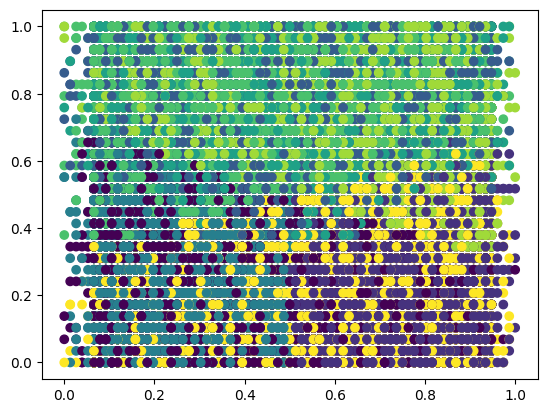

In [56]:
plt.scatter(df_processed.iloc[:,0], df_processed.iloc[:,1], c=km.labels_)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0           Urgent
1        Emergency
2        Emergency
3         Elective
4           Urgent
           ...    
55495     Elective
55496     Elective
55497       Urgent
55498     Elective
55499       Urgent
Name: Admission_type, Length: 54860, dtype: object

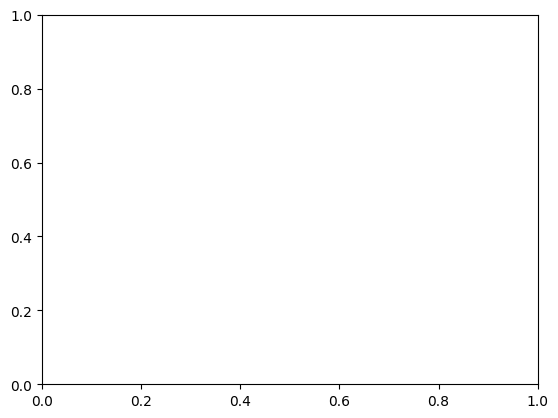

In [58]:
plt.scatter(df_processed.iloc[:,0], df_processed.iloc[:,1], c=df['Admission_type'])

Text(0.5, 0, 'k cluster number')

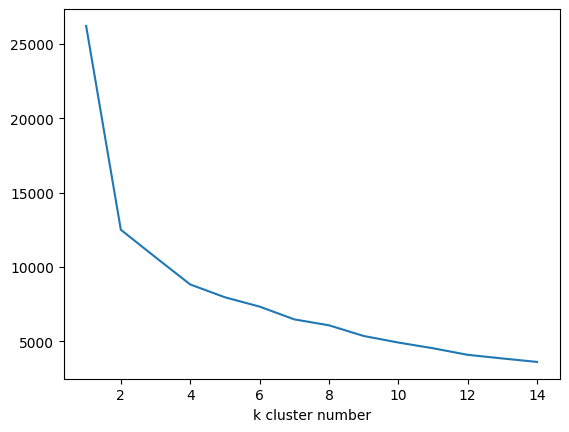

In [40]:
inertias = []
ks = range(1,15)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(df_reduced)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [34]:
km = KMeans(n_clusters=9)

km.fit(df_processed)

KMeans(n_clusters=9)

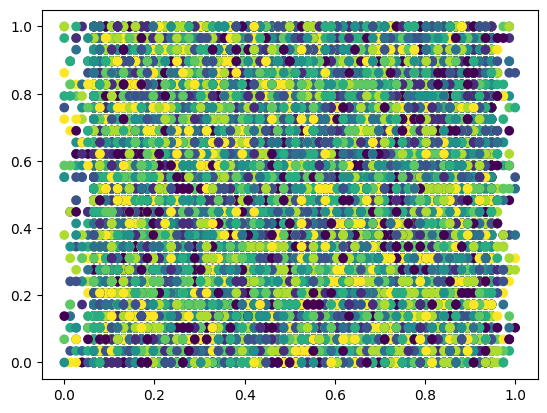

In [35]:
plt.scatter(df_processed.iloc[:,0], df_processed.iloc[:,1], c=km.labels_)